DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configurations, then run the four methods ( 𝑘 -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

## ORIGINAL CODE:

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

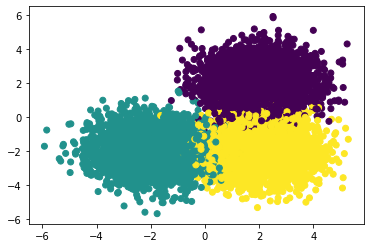

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


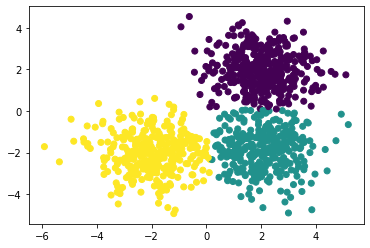

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

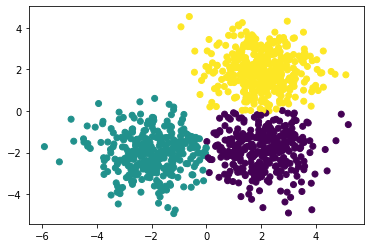

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5    0  357
1        9  310    1
2      306    5    7


In [7]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [8]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 32


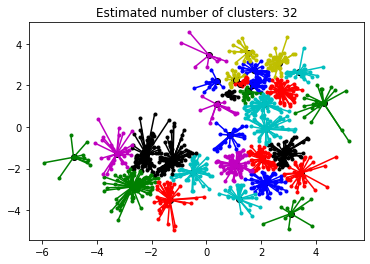

In [9]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## DRILL CODE:

Blob Set Up: a


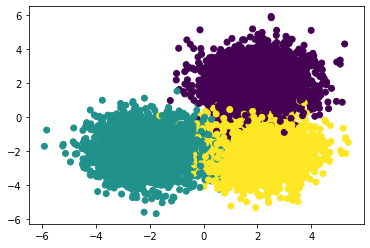

Blob Set Up: b


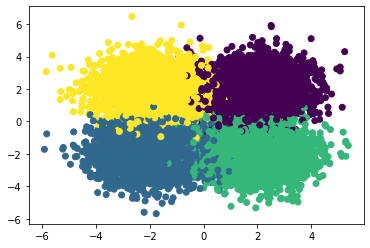

Blob Set Up: c


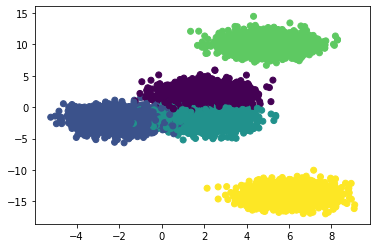

In [51]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers_a = [[2, 2], [-2, -2], [2, -2]] ##
centers_b = [[2, 2], [-2, -2], [2, -2],[-2, 2]] ##
centers_c = [[2, 2], [-2, -2], [2, -2],[5,10],[6,-14]] ##

Xa, ya = make_blobs(
    n_samples=8000,
    centers=centers_a,
    cluster_std=1,
    n_features=4,
    random_state=42)

Xb, yb = make_blobs(
    n_samples=10000,
    centers=centers_b,
    cluster_std=1,
    n_features=2,
    random_state=42)

Xc, yc = make_blobs(
    n_samples=10000,
    centers=centers_c,
    cluster_std=1,
    n_features=2,
    random_state=42)


def plot_blobs(X_n,y_n,run_lett):
    print(f'Blob Set Up: {run_lett}')
    plt.scatter(X_n[:, 0], X_n[:, 1], c=y_n)
    plt.show()

    #Divide into training and test sets.
    tts = train_test_split(
        X_n,
        y_n,
        test_size=0.9,
        random_state=42)
    return tts

run_a = plot_blobs(Xa,ya,'a')
run_b = plot_blobs(Xb,yb,'b')
run_c = plot_blobs(Xc,yc,'c')

# MEAN-SHIFT

In [53]:
def mean_shift_test(X_train,y_train,run_lett,quant=.2):
    print(f'Blob Set Up: {run_lett}')

    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=quant, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print(f"Number of estimated clusters: {n_clusters_}")

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))
    return pd.crosstab(y_train,labels)

Blob Set Up: a
Number of estimated clusters: 3


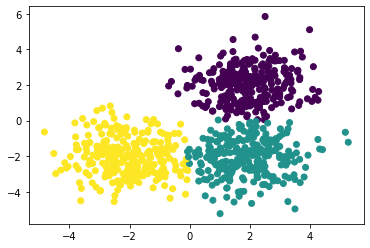

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      277    7    0
1        0   14  254
2        3  236    9
Blob Set Up: b
Number of estimated clusters: 4


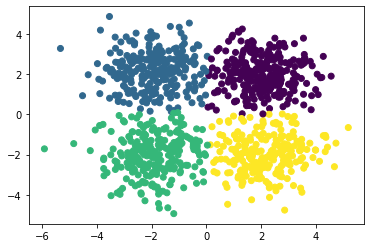

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0
Blob Set Up: c
Number of estimated clusters: 3


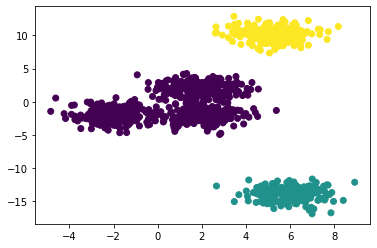

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      221    0    0
1      203    0    0
2      191    0    0
3        0    0  187
4        0  198    0


In [54]:
mst_a = mean_shift_test(run_a[0],run_a[2],'a')
mst_b = mean_shift_test(run_b[0],run_b[2],'b')
mst_c = mean_shift_test(run_c[0],run_c[2],'c')

## Spectral Clustering

In [56]:
def plot_spectral_clustering(clusters,X_train,y_train,run_lett):
    print(f'Blob Set Up: {run_lett}')

    # We know we're looking for three clusters.
    n_clusters=clusters

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    return pd.crosstab(y_train,predict)


Blob Set Up: a


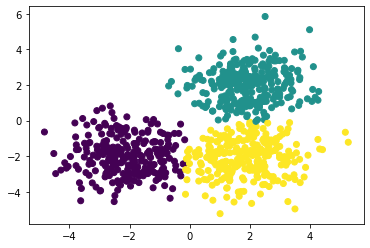

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  279    5
1      250    0   18
2        8    3  237
Blob Set Up: b


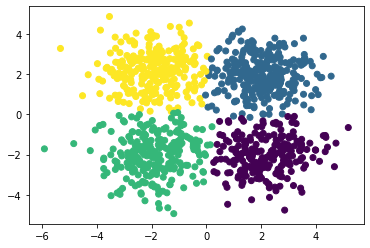

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        2  263    0    8
1        6    0  228    5
2      222    5   11    0
3        0    3    8  239
Blob Set Up: c


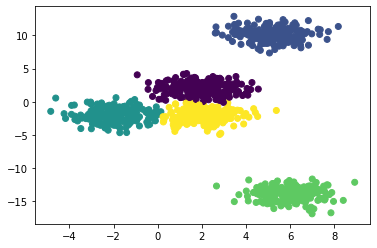

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      220    0    0    0    1
1        1    0  198    0    4
2        3    0    8    0  180
3        0  187    0    0    0
4        0    0    0  198    0


In [57]:
psc_a = plot_spectral_clustering(3,run_a[0],run_a[2],'a')
psc_b = plot_spectral_clustering(4,run_b[0],run_b[2],'b')
psc_c = plot_spectral_clustering(5,run_c[0],run_c[2],'c')

## Affinity Propagation

In [58]:
def plot_afmodel(X_train,y_train,run_lett):
    print(f'Blob Set Up: {run_lett}')

    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

Blob Set Up: a
Done
Estimated number of clusters: 25


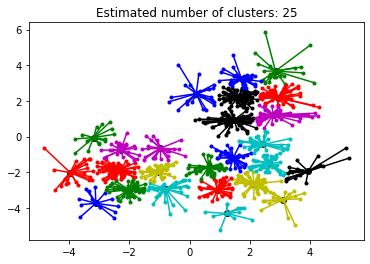

Blob Set Up: b
Done
Estimated number of clusters: 25


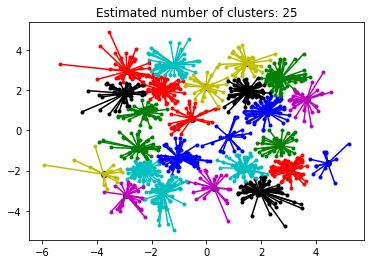

Blob Set Up: c
Done
Estimated number of clusters: 14


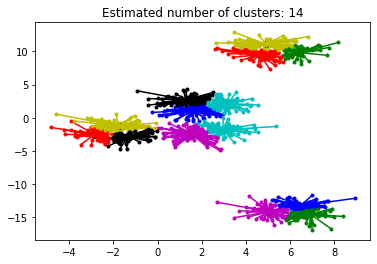

In [59]:
paf_a = plot_afmodel(run_a[0],run_a[2],'a')
paf_b = plot_afmodel(run_b[0],run_b[2],'b')
paf_b = plot_afmodel(run_c[0],run_c[2],'c')

Summary Report: 

Affinity Propagation does not do a good job of determining the intended amount of blobs. There is too much over estimation with this regardless of the way we set up the blobs. 

Spectral Clustering does a better job at clustering but the downside is that it seems less "unsupervised." As the user, we are actively telling the model to seek out a certain amount of clusters. This is more useful if you know how many clusters you expect...or how many you want to reduce your dataset to.

Mean-shift is nice in that it predicts a certain amount of clusters for you and allows you to play with features like damping to get the optimal amount of clusters. It's still a bit of a guessing game to figure out the best parameters to go by so in that sense, it is similar to spectral clustering (both need some kind of guidance from the user.